# This notebook uses Keras Functional API's to predict Benzene Levels in the air

### Include necesary Imports

In [41]:
from keras.models import Model
from keras.layers.core import Dense
from keras.layers import Input
from keras.models import Sequential

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

%matplotlib inline

### Read  the csv and preprocess the data

In [13]:
BENZENE_FILE = "/Users/tkmacl9/Desktop/FastAIDLCourse/nbs/datasets/UCI_benzene_levels/AirQualityUCI.csv"

bldf = pd.read_csv(BENZENE_FILE, delimiter=";", decimal=',', header=0)
bldf.head()

del bldf['Date']
del bldf['Time']

del bldf['Unnamed: 15']
del bldf['Unnamed: 16']

# fill NaNs in each column with the mean value and convert them as a matrix
print(bldf.head())
bldf = bldf.fillna(bldf.mean())
Xorig = bldf.as_matrix()
print(Xorig.shape)

   CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
0     2.6       1360.0     150.0      11.9         1046.0    166.0   
1     2.0       1292.0     112.0       9.4          955.0    103.0   
2     2.2       1402.0      88.0       9.0          939.0    131.0   
3     2.2       1376.0      80.0       9.2          948.0    172.0   
4     1.6       1272.0      51.0       6.5          836.0    131.0   

   PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH  
0        1056.0    113.0        1692.0       1268.0  13.6  48.9  0.7578  
1        1174.0     92.0        1559.0        972.0  13.3  47.7  0.7255  
2        1140.0    114.0        1555.0       1074.0  11.9  54.0  0.7502  
3        1092.0    122.0        1584.0       1203.0  11.0  60.0  0.7867  
4        1205.0    116.0        1490.0       1110.0  11.2  59.6  0.7888  
(9471, 13)


### Use StandardScaler to normalize the columns and spli the data

In [34]:
# Use the Z- normalization on the data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xorig)

#store the mean and std for later usage
X_mean = scaler.mean_
X_std = scaler.std_

print(X_mean.shape)
print(X_std.shape)

(13,)
(13,)


/Users/tkmacl9/anaconda/lib/python3.5/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function std_ is deprecated; Attribute ``std_`` will be removed in 0.19. Use ``scale_`` instead
  warnings.warn(msg, category=DeprecationWarning)


In [24]:
# pull out the benzene column as the target variable, and take the all other columns as the input data.

Y = X_scaled[:, 3]
X = np.delete(X_scaled, 3, axis=1)

split_data = int(0.7 * X.shape[0])
X_train, X_test, Y_train, Y_test = X[:split_data], X[split_data:], Y[:split_data], Y[split_data:]

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(6629, 12)
(2842, 12)
(6629,)
(2842,)


### Now define the model - a simple single layer and train the model

In [25]:
inputs = Input(shape=(12,))
x = Dense(8, activation='relu', kernel_initializer='glorot_uniform')(inputs)
benzene = Dense(1, kernel_initializer='glorot_uniform')(x)

model = Model(inputs=[inputs], outputs=[benzene])

model.compile(loss='mse', optimizer='adam')

In [26]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 12)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 113
Trainable params: 113
Non-trainable params: 0
_________________________________________________________________


In [27]:
NUM_EPOCHS = 20
BATCH_SIZE = 10

history = model.fit(X_train, Y_train, epochs=NUM_EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2)

Train on 5303 samples, validate on 1326 samples
Epoch 1/20
5303/5303 [==============================] - 0s - loss: 0.8021 - val_loss: 0.1847
Epoch 2/20
5303/5303 [==============================] - 0s - loss: 0.0423 - val_loss: 0.1119
Epoch 3/20
5303/5303 [==============================] - 0s - loss: 0.0241 - val_loss: 0.0808
Epoch 4/20
5303/5303 [==============================] - 0s - loss: 0.0154 - val_loss: 0.0716
Epoch 5/20
5303/5303 [==============================] - 0s - loss: 0.0100 - val_loss: 0.0647
Epoch 6/20
5303/5303 [==============================] - 0s - loss: 0.0066 - val_loss: 0.0567
Epoch 7/20
5303/5303 [==============================] - 0s - loss: 0.0046 - val_loss: 0.0499
Epoch 8/20
5303/5303 [==============================] - 0s - loss: 0.0032 - val_loss: 0.0430
Epoch 9/20
5303/5303 [==============================] - 0s - loss: 0.0024 - val_loss: 0.0381
Epoch 10/20
5303/5303 [==============================] - 0s - loss: 0.0018 - val_loss: 0.0311
Epoch 11/20
5303/5303

In [47]:
y_test_ = model.predict(X_test).flatten()
for i in range(10):
    label = (Y_test[i] * X_std[3]) + X_mean[3]
    prediction = (y_test_[i] * X_std[3]) + X_mean[3]    
    print("Actual Value - {:.3f}, Prediction Value - {:.3f}".format(label, prediction))
    
print(" ")
print(Y_test.shape)
print(y_test_.shape)

Actual Value - 11.600, Prediction Value - 4.852
Actual Value - 11.700, Prediction Value - 4.200
Actual Value - 11.300, Prediction Value - 5.871
Actual Value - 10.400, Prediction Value - 3.727
Actual Value - 6.400, Prediction Value - 0.335
Actual Value - 9.800, Prediction Value - 3.313
Actual Value - 5.800, Prediction Value - 1.665
Actual Value - 7.000, Prediction Value - 2.102
Actual Value - 4.000, Prediction Value - 1.427
Actual Value - 6.900, Prediction Value - 3.070
 
(2842,)
(2842,)


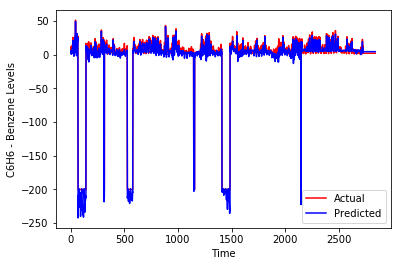

In [48]:
# plot the data on plot graphs

plt.plot(np.arange(Y_test.shape[0]),(Y_test * X_std[3]) + X_mean[3], color='r', label='Actual')
plt.plot(np.arange(y_test_.shape[0]),(y_test_ * X_std[3]) + X_mean[3], color='b', label='Predicted')
plt.xlabel("Time")
plt.ylabel("C6H6 - Benzene Levels")
plt.legend(loc='best')
plt.show()